In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
pd.set_option('use_inf_as_na', True)
from fastdtw import fastdtw
from joblib import dump, load

In [2]:
features = pd.read_csv('13f_dtw_features.csv')

In [3]:
full_re_run = False

In [4]:
features.head()

,FilerId,FilingId,Period,TurnOver,PercentValue,num_10_pct,num_20_pct,num_50_pct
0,1,1,2014-1,0.000000,100.0,2.0,7.0,25.0
1,1,3776,2014-2,0.221153,100.0,2.0,6.0,24.0
2,1,7584,2014-3,0.162403,100.0,2.0,7.0,25.0
3,1,11425,2014-4,0.017355,100.0,2.0,6.0,25.0
4,1,15237,2015-1,0.154250,100.0,2.0,7.0,24.0


In [5]:
a_df = features[features['FilerId']==867]
b_df = features[features['FilerId']==964].fillna(0)

In [6]:
turnover_distance, path = fastdtw(a_df['TurnOver'], b_df['TurnOver'], dist=euclidean)
num_10_pct_distance, path = fastdtw(a_df['num_10_pct'], b_df['num_10_pct'], dist=euclidean)
num_20_pct_distance, path = fastdtw(a_df['num_20_pct'], b_df['num_20_pct'], dist=euclidean)
num_50_pct_distance, path = fastdtw(a_df['num_50_pct'], b_df['num_50_pct'], dist=euclidean)

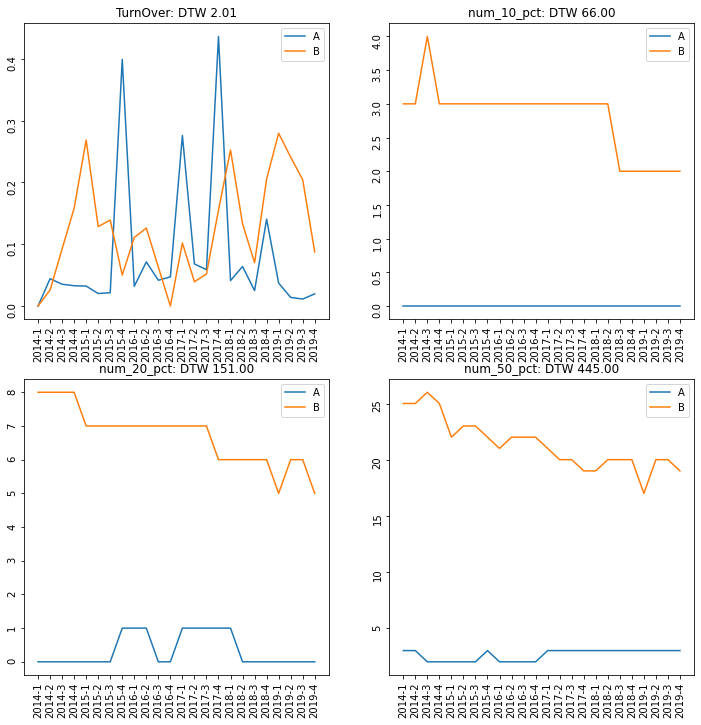

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0, 0].plot(a_df['Period'], a_df['TurnOver'], label='A')
axs[0, 0].plot(b_df['Period'], b_df['TurnOver'], label='B')
axs[0, 0].set_title(f'TurnOver: DTW {turnover_distance:0.2f}')
axs[0, 0].legend()
axs[0, 0].tick_params(labelrotation=90)

axs[0, 1].plot(a_df['Period'], a_df['num_10_pct'], label='A')
axs[0, 1].plot(b_df['Period'], b_df['num_10_pct'], label='B')
axs[0, 1].set_title(f'num_10_pct: DTW {num_10_pct_distance:0.2f}')
axs[0, 1].legend()
axs[0, 1].tick_params(labelrotation=90)

axs[1, 0].plot(a_df['Period'], a_df['num_20_pct'], label='A')
axs[1, 0].plot(b_df['Period'], b_df['num_20_pct'], label='B')
axs[1, 0].set_title(f'num_20_pct: DTW {num_20_pct_distance:0.2f}')
axs[1, 0].legend()
axs[1, 0].tick_params(labelrotation=90)

axs[1, 1].plot(a_df['Period'], a_df['num_50_pct'], label='A')
axs[1, 1].plot(b_df['Period'], b_df['num_50_pct'], label='B')
axs[1, 1].set_title(f'num_50_pct: DTW {num_50_pct_distance:0.2f}')
axs[1, 1].legend()
axs[1, 1].tick_params(labelrotation=90)

plt.savefig('brk_orleans.png')

In [8]:
distance, path = fastdtw(
    features[features['FilerId']==867]['TurnOver'],
    features[features['FilerId']==443]['TurnOver'],
    dist=euclidean
)
print(distance)

4.2071521718472855


In [9]:
distance, path = fastdtw(
    features.sample()['TurnOver'],
    features.sample()['TurnOver'],
    dist=euclidean
)
print(distance)

0.025174475941223295


In [10]:
features.head()

,FilerId,FilingId,Period,TurnOver,PercentValue,num_10_pct,num_20_pct,num_50_pct
0,1,1,2014-1,0.000000,100.0,2.0,7.0,25.0
1,1,3776,2014-2,0.221153,100.0,2.0,6.0,24.0
2,1,7584,2014-3,0.162403,100.0,2.0,7.0,25.0
3,1,11425,2014-4,0.017355,100.0,2.0,6.0,25.0
4,1,15237,2015-1,0.154250,100.0,2.0,7.0,24.0


In [12]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import from_tsfresh_dataset, to_tsfresh_dataset
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax

c:\users\kenfa\appdata\local\pypoetry\cache\virtualenvs\general-amrbeabv-py3.7\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
features_2 = features.rename(columns={'FilerId': 'id', 'Period': 'time'})[['id', 'time', 'TurnOver', 'num_10_pct', 'num_20_pct', 'num_50_pct']]

In [14]:
features_2.head()

,id,time,TurnOver,num_10_pct,num_20_pct,num_50_pct
0,1,2014-1,0.000000,2.0,7.0,25.0
1,1,2014-2,0.221153,2.0,6.0,24.0
2,1,2014-3,0.162403,2.0,7.0,25.0
3,1,2014-4,0.017355,2.0,6.0,25.0
4,1,2015-1,0.154250,2.0,7.0,24.0


In [15]:
features_2.describe()

,id,TurnOver,num_10_pct,num_20_pct,num_50_pct
count,106970.000000,106970.000000,106970.000000,106970.000000,106970.000000
mean,2690.184650,6.123373,1.360026,3.936655,17.819071
std,1664.739418,1877.772754,2.526145,5.643700,24.674848
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1293.000000,0.072439,0.000000,1.000000,4.000000
50%,2596.000000,0.179498,1.000000,2.000000,11.000000
75%,3899.000000,0.363377,2.000000,5.000000,22.000000
max,6936.000000,614143.658063,395.000000,403.000000,1224.000000


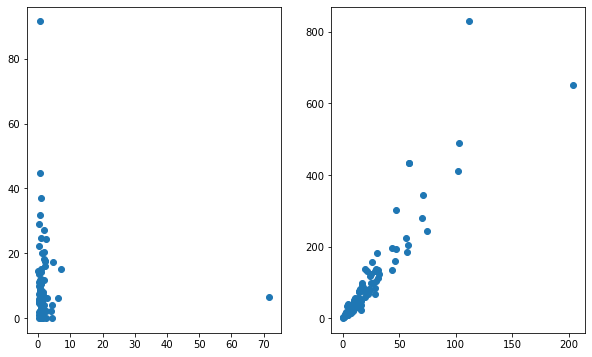

In [16]:
# Lets plot TurnOver v num_10_pct for a random sample of 100
turn_over = []
num_10_pct = []
num_20_pct = []
num_50_pct = []

for _ in range(100):
    a = features_2.sample()
    b = features_2.sample()
    
    turn_over.append(dtw(features_2[features_2['id'] == a['id'].iloc[0]]['TurnOver'].values,features_2[features_2['id'] == b['id'].iloc[0]]['TurnOver'].values))
    num_10_pct.append(dtw(features_2[features_2['id'] == a['id'].iloc[0]]['num_10_pct'].values,features_2[features_2['id'] == b['id'].iloc[0]]['num_10_pct'].values))
    num_20_pct.append(dtw(features_2[features_2['id'] == a['id'].iloc[0]]['num_20_pct'].values,features_2[features_2['id'] == b['id'].iloc[0]]['num_20_pct'].values))
    num_50_pct.append(dtw(features_2[features_2['id'] == a['id'].iloc[0]]['num_50_pct'].values,features_2[features_2['id'] == b['id'].iloc[0]]['num_50_pct'].values))
    
fix, axs = plt.subplots(1,2, figsize=(10, 6))
axs[0].scatter(turn_over, num_10_pct)
axs[1].scatter(num_20_pct, num_50_pct)
    

In [17]:
features_2.head()

,id,time,TurnOver,num_10_pct,num_20_pct,num_50_pct
0,1,2014-1,0.000000,2.0,7.0,25.0
1,1,2014-2,0.221153,2.0,6.0,24.0
2,1,2014-3,0.162403,2.0,7.0,25.0
3,1,2014-4,0.017355,2.0,6.0,25.0
4,1,2015-1,0.154250,2.0,7.0,24.0


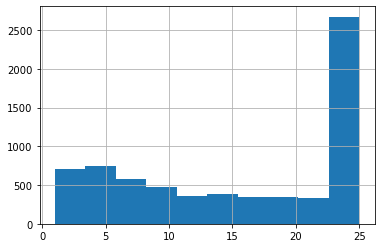

In [20]:
features_2.groupby('id')['time'].count().hist()

In [21]:
id = features_2['id'].sample().values[0]
print(id)
features_2[
    features_2['id']==id
]

5366


,id,time,TurnOver,num_10_pct,num_20_pct,num_50_pct
99349,5366,2017-4,0.000000,0.0,0.0,0.0
99350,5366,2018-1,0.021240,0.0,0.0,0.0
99351,5366,2018-2,0.113010,0.0,0.0,0.0
99352,5366,2018-3,0.740892,0.0,0.0,1.0
99353,5366,2018-4,0.459887,0.0,0.0,1.0
99354,5366,2019-1,0.486475,0.0,0.0,1.0
99355,5366,2019-2,0.000000,0.0,0.0,1.0
99356,5366,2019-3,0.000000,0.0,0.0,1.0
99357,5366,2019-4,0.000000,0.0,0.0,1.0


In [22]:
periods = ['2014-1', '2014-2', '2014-3', '2014-4',
           '2015-1', '2015-2', '2015-3', '2015-4',
           '2016-1', '2016-2', '2016-3', '2016-4',
           '2017-1', '2017-2', '2017-3', '2017-4',
           '2018-1', '2018-2', '2018-3', '2018-4',
           '2019-1', '2019-2', '2019-3', '2019-4',
           '2020-1']

In [23]:
# drop all those that are not in this period range
features_3 = features_2[
    features_2['time'].isin(periods)
]

In [24]:
features_3['time'].unique()

array(['2014-1', '2014-2', '2014-3', '2014-4', '2015-1', '2015-2',
       '2015-3', '2015-4', '2016-1', '2016-2', '2016-3', '2016-4',
       '2017-1', '2017-2', '2017-3', '2017-4', '2018-1', '2018-2',
       '2018-3', '2018-4', '2019-1', '2019-2', '2019-3', '2019-4',
       '2020-1'], dtype=object)

In [25]:
for period in periods:
    missing = features_3[~features_3['id'].isin(features_3[features_3['time']==period]['id'].unique())]['id'].unique()
    print(f"have {missing.shape[0]} missing from period {period}")

    k = pd.DataFrame(missing, columns=['id'])
    k['time'] = period
    k['TurnOver'] = 0
    k['num_10_pct'] = 0
    k['num_20_pct'] = 0
    k['num_50_pct'] = 0
    k
    
    features_3 = features_3.append(k, ignore_index=True)

have 3302 missing from period 2014-1
have 3249 missing from period 2014-2
have 3213 missing from period 2014-3
have 3225 missing from period 2014-4
have 2977 missing from period 2015-1
have 2931 missing from period 2015-2
have 2892 missing from period 2015-3
have 2904 missing from period 2015-4
have 2770 missing from period 2016-1
have 2779 missing from period 2016-2
have 2765 missing from period 2016-3
have 2802 missing from period 2016-4
have 2637 missing from period 2017-1
have 2631 missing from period 2017-2
have 2617 missing from period 2017-3
have 2628 missing from period 2017-4
have 2334 missing from period 2018-1
have 2282 missing from period 2018-2
have 2277 missing from period 2018-3
have 2268 missing from period 2018-4
have 1973 missing from period 2019-1
have 1953 missing from period 2019-2
have 1984 missing from period 2019-3
have 1982 missing from period 2019-4
have 3155 missing from period 2020-1


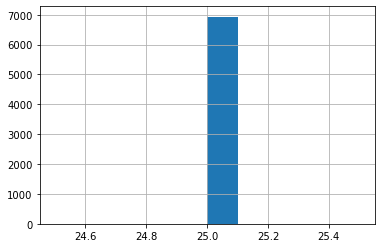

In [26]:
features_3.groupby('id')['time'].count().hist()

In [27]:
features_3.shape

(173375, 6)

In [28]:
dta_3 = from_tsfresh_dataset(features_3)
dta_scaled_3 = TimeSeriesScalerMeanVariance().fit_transform(dta_3)

In [29]:
x = [1,2,3,4,5,10,15,20,30,40,50,60,70,80,100]
y = []

In [30]:
if full_re_run:
    for n_clusters in x:
        model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=10, n_init=10, max_iter=10, verbose=0).fit(dta_scaled_3)
        y.append(model.inertia_)

In [31]:
if full_re_run:
    clustering_results = pd.DataFrame({'num_clusters': x, 'inertia': y})
    clustering_results['change'] = clustering_results['inertia'].diff().abs().fillna(0)
    clustering_results.to_csv('clustering_results.csv', index=False)
else:
    clustering_results = pd.read_csv('clustering_results.csv')
clustering_results

,num_clusters,inertia,change
0,1,57.550470,0.000000
1,2,48.606321,8.944149
2,3,44.889574,3.716747
3,4,42.121810,2.767764
4,5,40.141740,1.980070
5,10,34.620881,5.520859
6,15,32.734762,1.886119
7,20,31.189475,1.545287
8,30,28.919979,2.269495
9,40,27.579913,1.340067


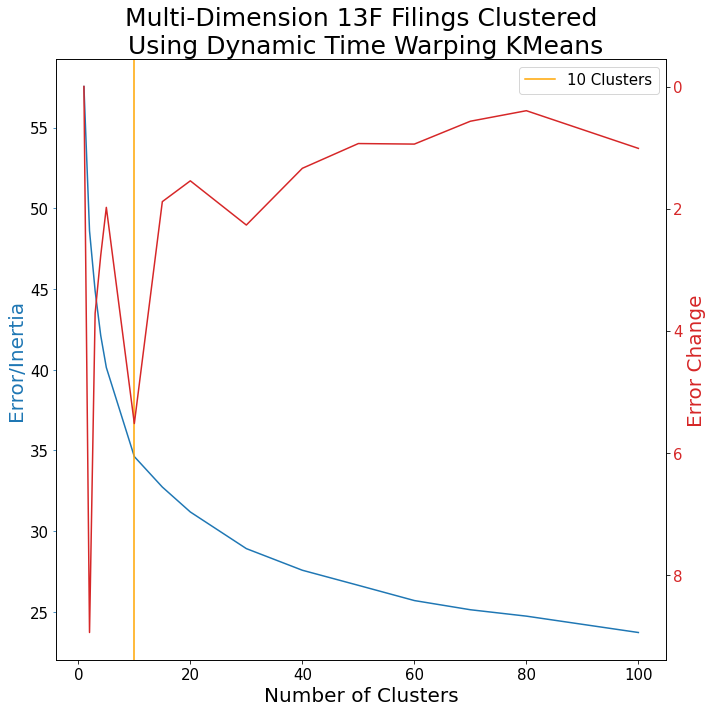

In [32]:
fig, ax1 = plt.subplots(figsize=(10,10))

plt.title('Multi-Dimension 13F Filings Clustered\n Using Dynamic Time Warping KMeans', fontsize=25)

ax1.set_xlabel('Number of Clusters', fontsize=20)
ax1.tick_params(axis='x', labelsize=15)

color = 'tab:blue'
ax1.set_ylabel('Error/Inertia', fontsize=20, color=color)
ax1.plot(clustering_results['num_clusters'],clustering_results['inertia'], color=color)
ax1.tick_params(axis='y', labelsize=15, color=color)


color = 'tab:red'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Error Change', color=color, fontsize=20)
ax2.plot(clustering_results['num_clusters'],clustering_results['change'], color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)
ax2.set_ylim(ax2.get_ylim()[::-1])

ax1.axvline(10, color='orange', label='10 Clusters')

ax1.legend(fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('dtw-kmeans.png')
plt.show()

In [33]:
if full_re_run:
    k10_model = TimeSeriesKMeans(n_clusters=10, metric="dtw", random_state=10, n_init=10, max_iter=10, verbose=0).fit(dta_scaled_3)
    dump(k10_model, 'k10_model.joblib')
else:
    k10_model = load('k10_model.joblib') 

In [34]:
if full_re_run:
    max_val = features_3.groupby('id').max().reset_index()
    min_val = features_3.groupby('id').min().reset_index()
    avg_val = features_3.groupby('id').mean().reset_index()
    
    filers = pd.DataFrame({
    'FilingId': features_3['id'].unique(), 
    'Cluster': k10_model.labels_,
    'max_turnover': max_val['TurnOver'],
    'max_num_10_pct': max_val['num_10_pct'],
    'max_num_20_pct': max_val['num_20_pct'],
    'max_num_50_pct': max_val['num_50_pct'],
    'min_turnover': min_val['TurnOver'],
    'min_num_10_pct': min_val['num_10_pct'],
    'min_num_20_pct': min_val['num_20_pct'],
    'min_num_50_pct': min_val['num_50_pct'],
    'avg_turnover': avg_val['TurnOver'],
    'avg_num_10_pct': avg_val['num_10_pct'],
    'avg_num_20_pct': avg_val['num_20_pct'],
    'avg_num_50_pct': avg_val['num_50_pct'],
    })
    filers.to_csv('filers_clustered.csv', index=False)
else:
    filers = pd.read_csv('filers_clustered.csv')

In [35]:
filers.head()

,FilingId,Cluster,max_turnover,max_num_10_pct,max_num_20_pct,max_num_50_pct,min_turnover,min_num_10_pct,min_num_20_pct,min_num_50_pct,avg_turnover,avg_num_10_pct,avg_num_20_pct,avg_num_50_pct
0,1,0,0.385279,3.0,7.0,27.0,0.0,1.0,5.0,22.0,0.154645,2.20,6.36,24.40
1,2,5,0.178518,4.0,9.0,24.0,0.0,4.0,8.0,22.0,0.054295,4.00,8.48,23.04
2,3,0,0.978946,2.0,10.0,65.0,0.0,0.0,0.0,0.0,0.303979,0.36,2.00,24.16
3,4,0,0.661354,3.0,8.0,41.0,0.0,0.0,1.0,5.0,0.340209,1.00,3.56,20.68
4,5,0,0.253957,3.0,13.0,68.0,0.0,0.0,6.0,51.0,0.162099,1.88,9.72,61.56


In [36]:
filtered_filers = filers[filers['max_turnover']<200]
filtered_filers = filtered_filers[filtered_filers['max_num_10_pct']<100]

In [37]:
label_color = [f'C{l}' for l in filtered_filers['Cluster']]

(0.0, 0.6)

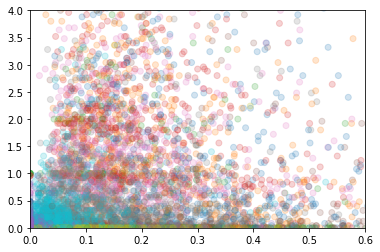

In [45]:
plt.scatter(filtered_filers['avg_turnover'], filtered_filers['avg_num_10_pct'], color=label_color, alpha=0.2)
plt.ylim(0,4)
plt.xlim(0,0.6)

(0.0, 0.75)

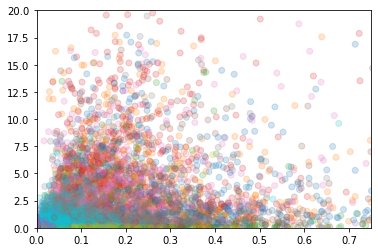

In [48]:
plt.scatter(filtered_filers['avg_turnover'], filtered_filers['avg_num_20_pct'], color=label_color, alpha=0.2)
plt.ylim(0,20)
plt.xlim(0,0.75)

(0.0, 0.5)

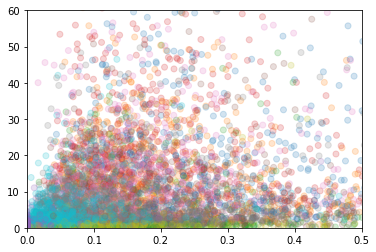

In [51]:
plt.scatter(filtered_filers['avg_turnover'], filtered_filers['avg_num_50_pct'], color=label_color, alpha=0.2)
plt.ylim(0,60)
plt.xlim(0,0.5)

In [54]:
# how many filers fall into each group?
filtered_filers['Cluster'].value_counts()

7    967
2    821
9    795
8    685
3    679
0    643
6    633
1    606
5    554
4    541
Name: Cluster, dtype: int64

In [55]:
filtered_filers.head()

,FilingId,Cluster,max_turnover,max_num_10_pct,max_num_20_pct,max_num_50_pct,min_turnover,min_num_10_pct,min_num_20_pct,min_num_50_pct,avg_turnover,avg_num_10_pct,avg_num_20_pct,avg_num_50_pct
0,1,0,0.385279,3.0,7.0,27.0,0.0,1.0,5.0,22.0,0.154645,2.20,6.36,24.40
1,2,5,0.178518,4.0,9.0,24.0,0.0,4.0,8.0,22.0,0.054295,4.00,8.48,23.04
2,3,0,0.978946,2.0,10.0,65.0,0.0,0.0,0.0,0.0,0.303979,0.36,2.00,24.16
3,4,0,0.661354,3.0,8.0,41.0,0.0,0.0,1.0,5.0,0.340209,1.00,3.56,20.68
4,5,0,0.253957,3.0,13.0,68.0,0.0,0.0,6.0,51.0,0.162099,1.88,9.72,61.56


In [56]:
filtered_filers[filtered_filers['FilingId']==867]

,FilingId,Cluster,max_turnover,max_num_10_pct,max_num_20_pct,max_num_50_pct,min_turnover,min_num_10_pct,min_num_20_pct,min_num_50_pct,avg_turnover,avg_num_10_pct,avg_num_20_pct,avg_num_50_pct
866,867,2,0.436143,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.078746,0.0,0.32,2.52


In [63]:
filtered_filers['avg_turnover'].describe()

count    6924.000000
mean        0.194481
std         0.529637
min         0.000000
25%         0.049510
50%         0.122242
75%         0.231842
max        14.415038
Name: avg_turnover, dtype: float64

In [65]:
filtered_filers[filtered_filers['avg_turnover']>5]

,FilingId,Cluster,max_turnover,max_num_10_pct,max_num_20_pct,max_num_50_pct,min_turnover,min_num_10_pct,min_num_20_pct,min_num_50_pct,avg_turnover,avg_num_10_pct,avg_num_20_pct,avg_num_50_pct
8,9,1,21.906510,5.0,16.0,103.0,0.0,2.0,12.0,86.0,7.197923,3.08,13.84,94.68
594,595,3,45.995207,9.0,26.0,132.0,0.0,0.0,0.0,0.0,8.664259,7.36,20.60,109.40
684,685,3,72.484015,6.0,16.0,89.0,0.0,0.0,0.0,0.0,14.415038,4.48,13.36,73.12
799,800,5,102.580254,9.0,27.0,165.0,0.0,0.0,1.0,9.0,13.614277,5.28,17.00,104.64
834,835,3,81.978298,8.0,22.0,110.0,0.0,0.0,0.0,0.0,9.103787,6.36,17.40,92.76
887,888,9,66.403643,18.0,49.0,249.0,0.0,0.0,0.0,0.0,6.283535,3.44,14.68,123.84
1570,1571,0,127.314905,7.0,20.0,127.0,0.0,0.0,0.0,0.0,13.108725,3.92,13.84,88.64
1571,1572,7,146.254999,11.0,32.0,237.0,0.0,0.0,0.0,0.0,9.795899,4.92,13.96,99.52
1573,1574,7,131.592774,6.0,19.0,108.0,0.0,0.0,0.0,0.0,10.104151,2.88,8.28,49.12
1906,1907,1,109.291661,9.0,23.0,84.0,0.0,0.0,0.0,0.0,10.708334,5.04,12.68,45.16


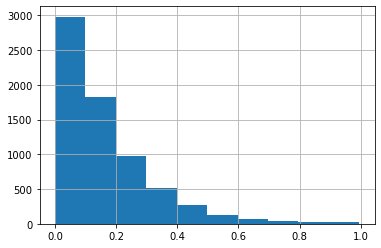

In [67]:
filtered_filers[filtered_filers['avg_turnover']<1]['avg_turnover'].hist()

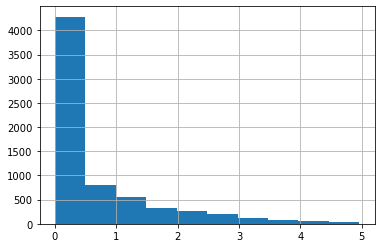

In [73]:
filtered_filers[filtered_filers['avg_num_10_pct']<5]['avg_num_10_pct'].hist()

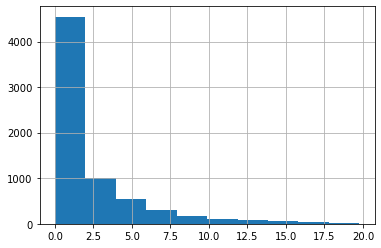

In [75]:
filtered_filers[filtered_filers['avg_num_20_pct']<20]['avg_num_20_pct'].hist()

In [77]:
buff_cluster = filtered_filers[filtered_filers['Cluster']==2]

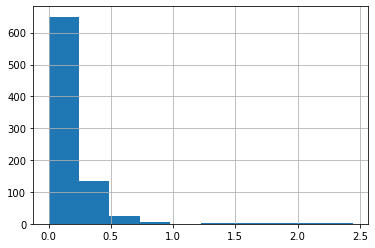

In [78]:
buff_cluster['avg_turnover'].hist()

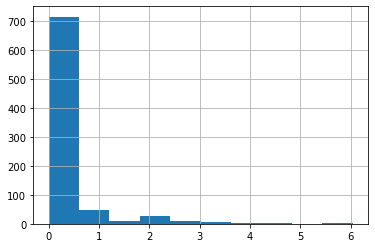

In [79]:
buff_cluster['avg_num_10_pct'].hist()